In [631]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [632]:
# import csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# take a look at the trianing set
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Allison, Miss. Helen Loraine",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [633]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [634]:
# see the data sample
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [635]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Allison, Miss. Helen Loraine",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [636]:
# check the unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


% of male survived: -  74.20382165605095
% of male survived: -  18.890814558058924


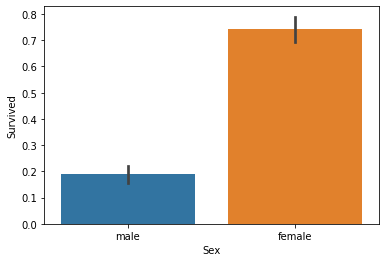

In [637]:
# draw a plot of survival by sex
sns.barplot(x="Sex", y="Survived", data = train)

print("% of male survived: - ", train["Survived"][train["Sex"]=='female'].value_counts(normalize= True)[1]*100)
print("% of male survived: - ", train["Survived"][train["Sex"]=='male'].value_counts(normalize= True)[1]*100)

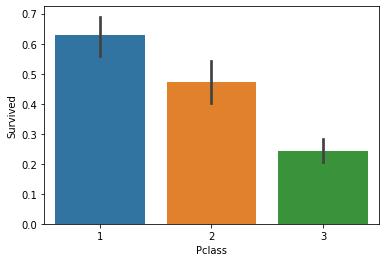

In [638]:
# draw a plot of survival by pcclass
sns.barplot(x="Pclass", y="Survived", data = train)

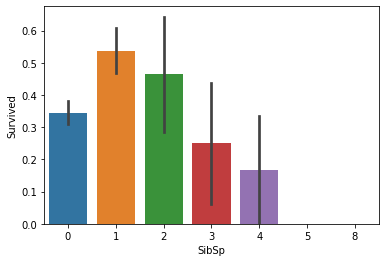

In [639]:
# draw a plot of survival by SibSp
sns.barplot(x="SibSp", y="Survived", data = train)

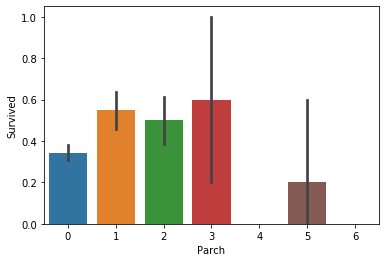

In [640]:
# draw a plot of survival by Parch
sns.barplot(x="Parch", y="Survived", data = train)

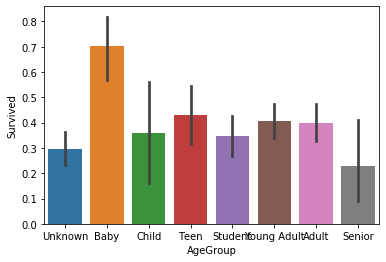

In [641]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels1 = ['Unknown', 'Baby', 'Child','Teen', 
          'Student', 'Young Adult', 'Adult', 'Senior']

# create a new column in training data with name AgeGroup
# Cut function - add the range for the range of data

train["AgeGroup"] = pd.cut(train["Age"], 
                        bins,
                        labels=labels1)
test["AgeGroup"] = pd.cut(test["Age"], 
                        bins,
                        labels=labels1)

# train.describe(include="all")
# train.sample(15)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


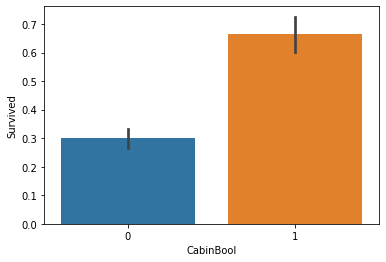

In [642]:
# create a new column s.t. if cabin is notnull then 1 else 0
train["CabinBool"]= train["Cabin"].notnull().astype("int")
test["CabinBool"] = test["Cabin"].notnull().astype("int")

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", 
      train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", 
      train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

# train.sample(5)
sns.barplot(x="CabinBool", y="Survived", data = train)
plt.show()

In [643]:
# CLEANING DATA STARts
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Coutts, Mrs. William (Winnie Minnie"" Treanor)""",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [644]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [645]:
# now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [646]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

In [647]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [648]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [649]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [650]:
pd.crosstab(train['Title'], train['AgeGroup'])

AgeGroup,Unknown,Baby,Child,Teen,Student,Young Adult,Adult,Senior
Title,,,,,,,,
1,119,0,1,34,88,146,111,18
2,36,21,11,29,35,33,19,1
3,17,0,0,7,14,37,49,2
4,4,23,13,0,0,0,0,0
5,0,0,0,0,0,1,1,0
6,1,0,0,0,1,3,15,1


In [651]:
# fill the missing age on the basis of title that have 
# agegroup appeared more often

m1_age = train[(train["Title"]==1) & (train["AgeGroup"]!='Unknown')]["AgeGroup"].mode()[0]
m2_age = train[(train["Title"]==2) & (train["AgeGroup"]!='Unknown')]["AgeGroup"].mode()[0]
m3_age = train[(train["Title"]==3) & (train["AgeGroup"]!='Unknown')]["AgeGroup"].mode()[0]
m4_age = train[(train["Title"]==4) & (train["AgeGroup"]!='Unknown')]["AgeGroup"].mode()[0]
m5_age = train[(train["Title"]==5) & (train["AgeGroup"]!='Unknown')]["AgeGroup"].mode()[0]
m6_age = train[(train["Title"]==6) & (train["AgeGroup"]!='Unknown')]["AgeGroup"].mode()[0]

age_title_mapping = {1: m1_age, 
                     2: m2_age,
                    3: m3_age,
                    4: m4_age,
                    5: m5_age,
                    6: m6_age}
# ya, s, a, b, a, a
print(m1_age)
train.sample(50)

Young Adult


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
168,169,0,1,"Baumann, Mr. John D",male,-0.5,0,0,25.9250,S,Unknown,0,1
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,9.4750,S,Adult,0,3
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,227.5250,C,Adult,0,2
815,816,0,1,"Fry, Mr. Richard",male,-0.5,0,0,0.0000,S,Unknown,1,1
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,7.7500,Q,Senior,0,1
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,32.3208,S,Senior,1,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,-0.5,0,0,0.0000,S,Unknown,0,1
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,38.5000,S,Adult,1,1
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,Student,0,1
557,558,0,1,"Robbins, Mr. Victor",male,-0.5,0,0,227.5250,C,Unknown,0,1


In [652]:
train.loc[train["AgeGroup"]=='Unknown',"AgeGroup"] = train['Title'].map(age_title_mapping)
test.loc[test["AgeGroup"]=='Unknown',"AgeGroup"] = test['Title'].map(age_title_mapping)
train.sample(50)
pd.crosstab(train['Title'], train['AgeGroup'])

AgeGroup,Baby,Child,Teen,Student,Young Adult,Adult,Senior
Title,,,,,,,
1,0,1,34,88,265,111,18
2,21,11,29,71,33,19,1
3,0,0,7,14,37,66,2
4,27,13,0,0,0,0,0
5,0,0,0,0,1,1,0
6,0,0,0,1,3,16,1


In [653]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teen': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
# train.loc[train["AgeGroup"],"AgeGroup"] = train['Title'].map(age_title_mapping)


train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)
pd.crosstab(train['Title'], train['AgeGroup'])

AgeGroup,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Title,,,,,,,
1,0,1,34,88,265,111,18
2,21,11,29,71,33,19,1
3,0,0,7,14,37,66,2
4,27,13,0,0,0,0,0
5,0,0,0,0,1,1,0
6,0,0,0,1,3,16,1


In [654]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [655]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [656]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [657]:
# Create a mapping with pclass column and corresponding mean of fare column
pclass_fare_mapping = train.filter(["Pclass", "Fare"]).groupby('Pclass')['Fare'].mean()

# check the unusable values
# print(pd.isnull(train).sum())

# fetch unique values of fare column
# train.Fare.unique()
# fetch rows for fare = 0.0
# train[train['Fare']==0.0]

In [658]:
# update fare column of values 0 with mean fare corresponding to pclass
train.loc[train['Fare']==0.0,'Fare'] = train['Pclass'].map(pclass_fare_mapping)

test.loc[test['Fare']==0.0,'Fare'] = test['Pclass'].map(pclass_fare_mapping)
test.loc[test['Fare'].isnull(),'Fare'] = test['Pclass'].map(pclass_fare_mapping)

#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [659]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,1
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [660]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [661]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [662]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.2


In [663]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.23


In [664]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

77.66


In [665]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

77.16


In [666]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

78.17


In [667]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.74


In [668]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

81.22


In [669]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

80.71


In [670]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.26


In [671]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.26
3,Random Forest,82.74
0,Support Vector Machines,82.23
1,KNN,81.22
8,Stochastic Gradient Descent,80.71
2,Logistic Regression,80.20
4,Naive Bayes,78.68
7,Decision Tree,78.17
6,Linear SVC,77.66
5,Perceptron,77.16


In [672]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)